# How safe is Berlin?

## Dependencies/Preliminaries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/berlin-plz/berlin_plz.geojson
/kaggle/input/berlin-plz/lor_bezirksregionen.geojson
/kaggle/input/crime-in-berlin-2012-2019/Berlin_crimes.csv


In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## Datasets

### 1. Dataset 1: [Crime in Berlin, Germany, 2012 - 2019](https://www.kaggle.com/datasets/danilzyryanov/crime-in-berlin-2012-2019)
**Statistics about crimes from the Commissariat of Berlin**

**NOTE:** The most updated form of this dataset (including 2021) is [here](https://www.berlin.de/polizei/service/kriminalitaetsatlas/).

#### About Dataset
[The following information came with the dataset.]

**Context**
Berlin is a special city, multicultural This is a geojson file [Source] which provides a list of postal codes (called Postleitzahl or PLZ for short) and their respective geometries in the form of polygons. This data is also available here.. And the crime image is special there.

**Content**
For example there are no bloody drug wars, ghetto or neighborhoods where police afraid to get. Crimes like "deprivation of liberty" and "treat" are in one column. But "larceny" - separated to 4 categories: theft of bikes, of auto, from auto (sic!) and rest kind of theft. Particular column for "Damage to property due graffiti" (Sach-beschädigung durch Graffiti (sic!). Numbers of crimes are connected with every single neighborhood of Berlin's part. Statistics covering period of 2012 - 2019 years.

**Acknowledgements**
Special thanks for assistance in translation to Alexei Klaus and Benjamin Proksch, Germany.

**Inspiration**
Questions to community:
1) what part of Berlin is most dangerous?  
2) what crimes are growing?  
3) what crimes are going low?  
4) would be great to build Folium based heatmap.

In [3]:
df = pd.read_csv('/kaggle/input/crime-in-berlin-2012-2019/Berlin_crimes.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            1200 non-null   int64 
 1   District        1200 non-null   object
 2   Code            1200 non-null   int64 
 3   Location        1200 non-null   object
 4   Robbery         1200 non-null   int64 
 5   Street_robbery  1200 non-null   int64 
 6   Injury          1200 non-null   int64 
 7   Agg_assault     1200 non-null   int64 
 8   Threat          1200 non-null   int64 
 9   Theft           1200 non-null   int64 
 10  Car             1200 non-null   int64 
 11  From_car        1200 non-null   int64 
 12  Bike            1200 non-null   int64 
 13  Burglary        1200 non-null   int64 
 14  Fire            1200 non-null   int64 
 15  Arson           1200 non-null   int64 
 16  Damage          1200 non-null   int64 
 17  Graffiti        1200 non-null   int64 
 18  Drugs   

,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
0,2012,Mitte,10111,Tiergarten Süd,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032
1,2012,Mitte,10112,Regierungsviertel,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870
2,2012,Mitte,10113,Alexanderplatz,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108
3,2012,Mitte,10114,Brunnenstraße Süd,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213,752
4,2012,Mitte,10221,Moabit West,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403


### 2. Dataset 2: [Berlin PLZ](https://www.kaggle.com/datasets/abhirupghosh184098/berlin-plz)

#### About Dataset

This dataset has 2 files:

* **berlin_plz.csv**: This is a geojson file [[Source](https://daten.odis-berlin.de/de/dataset/plz/)] which provides a list of postal codes (called Postleitzahl or PLZ for short) and their respective geometries in the form of polygons. This data is also available [here](https://www.berlin.de/sen/sbw/stadtdaten/geoportal/geoportal-daten-und-dienste/).

* **lor_bezirksregionen**: This is a geojson file [[Source](https://daten.odis-berlin.de/de/dataset/lor_bezirksregionen/)] which provides a list of districts (called Bezirke in German) and their respective geometries in the form of polygons. This data is also available [here](https://www.berlin.de/sen/sbw/stadtdaten/geoportal/geoportal-daten-und-dienste/).

### 2.1. Districts

In [4]:
districts = gpd.read_file('/kaggle/input/berlin-plz/lor_bezirksregionen.geojson')
districts.rename(columns={'broker Dow':'Code'}, inplace=True)
districts['Code'] = districts.Code.astype('int')
districts.info()
districts.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   BEZIRKSNAM  138 non-null    object  
 1   BEZIRKSREG  138 non-null    object  
 2   DATUM_GUEL  138 non-null    object  
 3   FLAECHENGR  138 non-null    float64 
 4   Code        138 non-null    int64   
 5   geometry    138 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 6.6+ KB


,BEZIRKSNAM,BEZIRKSREG,DATUM_GUEL,FLAECHENGR,Code,geometry
0,Mitte,Tiergarten Süd,26.10.2007,5.171462e+06,10111,"MULTIPOLYGON (((389319.54544 5817775.77883, 38..."
1,Mitte,Regierungsviertel,26.10.2007,2.691032e+06,10112,"MULTIPOLYGON (((389869.33071 5820074.33487, 38..."
2,Mitte,Alexanderplatz,26.10.2007,6.228903e+06,10113,"MULTIPOLYGON (((391669.88643 5818749.58520, 39..."
3,Mitte,Brunnenstraße Süd,26.10.2007,1.753345e+06,10114,"MULTIPOLYGON (((391729.06696 5822322.36310, 39..."
4,Mitte,Moabit West,26.10.2007,4.329256e+06,10221,"MULTIPOLYGON (((387739.36696 5822280.60519, 38..."


### 2.2. Postal Codes

In [5]:
plz = gpd.read_file('/kaggle/input/berlin-plz/berlin_plz.geojson', dtypes={'plz':'str'})
plz.info()
plz.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   plz       194 non-null    object  
 1   geometry  194 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 3.2+ KB


,plz,geometry
0,10115,"POLYGON ((13.36586 52.53566, 13.36829 52.53329..."
1,10117,"POLYGON ((13.37374 52.52780, 13.37382 52.52770..."
2,10119,"POLYGON ((13.39902 52.52701, 13.40134 52.52631..."
3,10178,"POLYGON ((13.39902 52.52701, 13.39877 52.52679..."
4,10179,"POLYGON ((13.40305 52.51217, 13.40261 52.51186..."


## Making one dataset
By combining the districts and the crimes datasets.

In [6]:
df_all = df.merge(districts, on='Code', how='inner')
df_all = gpd.GeoDataFrame(df_all)
df_all.info()
df_all.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1104 entries, 0 to 1103
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Year            1104 non-null   int64   
 1   District        1104 non-null   object  
 2   Code            1104 non-null   int64   
 3   Location        1104 non-null   object  
 4   Robbery         1104 non-null   int64   
 5   Street_robbery  1104 non-null   int64   
 6   Injury          1104 non-null   int64   
 7   Agg_assault     1104 non-null   int64   
 8   Threat          1104 non-null   int64   
 9   Theft           1104 non-null   int64   
 10  Car             1104 non-null   int64   
 11  From_car        1104 non-null   int64   
 12  Bike            1104 non-null   int64   
 13  Burglary        1104 non-null   int64   
 14  Fire            1104 non-null   int64   
 15  Arson           1104 non-null   int64   
 16  Damage          1104 non-null   int64   
 17  Graffi

,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,...,Arson,Damage,Graffiti,Drugs,Local,BEZIRKSNAM,BEZIRKSREG,DATUM_GUEL,FLAECHENGR,geometry
0,2012,Mitte,10111,Tiergarten Süd,70,46,586,194,118,2263,...,4,273,26,171,1032,Mitte,Tiergarten Süd,26.10.2007,5.171462e+06,"MULTIPOLYGON (((389319.54544 5817775.77883, 38..."
1,2013,Mitte,10111,Tiergarten Süd,88,60,522,148,124,2652,...,3,263,28,114,974,Mitte,Tiergarten Süd,26.10.2007,5.171462e+06,"MULTIPOLYGON (((389319.54544 5817775.77883, 38..."
2,2014,Mitte,10111,Tiergarten Süd,74,48,514,134,133,2604,...,5,252,30,163,1043,Mitte,Tiergarten Süd,26.10.2007,5.171462e+06,"MULTIPOLYGON (((389319.54544 5817775.77883, 38..."
3,2015,Mitte,10111,Tiergarten Süd,82,59,480,109,108,2763,...,11,304,85,137,949,Mitte,Tiergarten Süd,26.10.2007,5.171462e+06,"MULTIPOLYGON (((389319.54544 5817775.77883, 38..."
4,2016,Mitte,10111,Tiergarten Süd,65,54,462,108,125,2519,...,2,239,31,139,883,Mitte,Tiergarten Süd,26.10.2007,5.171462e+06,"MULTIPOLYGON (((389319.54544 5817775.77883, 38..."


In [7]:
crime_cols = ['Robbery', 'Street_robbery', 'Injury', 'Agg_assault', 
              'Threat', 'Theft', 'Car', 'From_car', 'Bike', 'Burglary', 
              'Fire', 'Arson', 'Damage', 'Graffiti', 'Drugs']

# Gross Statistics

### Types of crimes and how common are they?

In [8]:
df_all[crime_cols].sum().sort_values(ascending=False)

Theft             1730303
Damage             328835
Injury             323747
From_car           248469
Bike               231146
Drugs              113982
Threat             107985
Burglary            83337
Agg_assault         80211
Graffiti            71322
Car                 49314
Robbery             39160
Street_robbery      20979
Fire                18780
Arson                7343
dtype: int64

It is not surprising that Theft is the most common source of crime in Berlin, almost 6 times more frequent than the second-most common form of crime ('Damage').

### How have numbers progressed over time?

Text(0, 0.5, 'Counts')

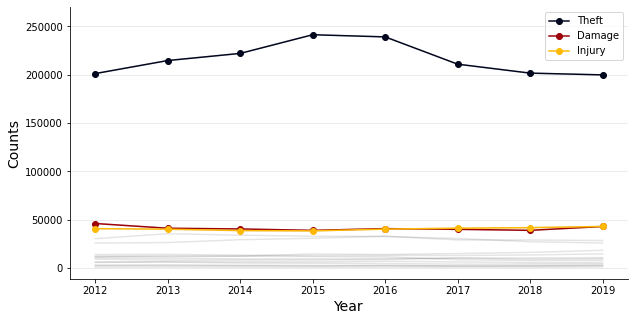

In [9]:
fig, ax = plt.subplots(figsize=(10,5))

df_all[['Year'] + crime_cols].groupby('Year').sum().plot(ax=ax, color='k', alpha=0.1, legend=False)
df_all[['Year'] + crime_cols].groupby('Year').sum()['Theft'].plot(ax=ax, color='#03071e', marker='o', legend=True)
df_all[['Year'] + crime_cols].groupby('Year').sum()['Damage'].plot(ax=ax, color='#9d0208', marker='o', legend=True)
df_all[['Year'] + crime_cols].groupby('Year').sum()['Injury'].plot(ax=ax, color='#ffba08', marker='o', legend=True)

ax.spines[['right', 'top']].set_visible(False)
#ax.legend(frameon=False)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(top=270000)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)

### What fraction of robberies are on the street?

They seem to be on the rise!

Text(0.5, 0, 'Year')

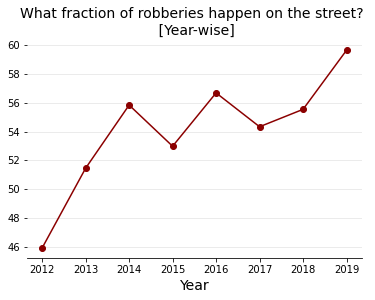

In [10]:
df_frac = df_all[['Year'] + ['Robbery', 'Street_robbery']].groupby('Year').sum()

fig, ax = plt.subplots()
pd.DataFrame(100*df_frac['Street_robbery']/df_frac['Robbery']).plot(ax=ax, marker='o', color='darkred', legend=False)

ax.spines[['left', 'right', 'top']].set_visible(False)
ax.grid(axis='y', alpha=0.3)
ax.set_title('What fraction of robberies happen on the street? \n [Year-wise]', fontsize=14)
ax.set_xlabel('Year', fontsize=14)

### What fraction of crimes are local?

Text(0.5, 0, 'Year')

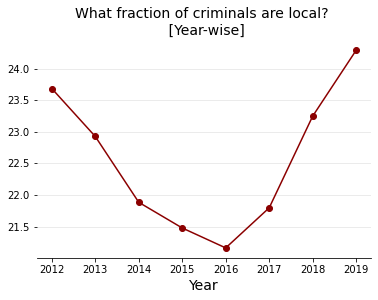

In [11]:
df_frac = pd.DataFrame(df_all[['Year'] + crime_cols].groupby('Year').sum().sum(axis=1)).rename(columns={0:'Total'}).join(df_all[['Year','Local']].groupby('Year').sum())

fig, ax = plt.subplots()
pd.DataFrame(100*df_frac['Local']/df_frac['Total']).plot(ax=ax, marker='o', color='darkred', legend=False)

ax.spines[['left', 'right', 'top']].set_visible(False)
ax.grid(axis='y', alpha=0.3)
ax.set_title('What fraction of criminals are local? \n [Year-wise]', fontsize=14)
ax.set_xlabel('Year', fontsize=14)

# Geo-spatial analysis: WHERE in Berlin is it safe?

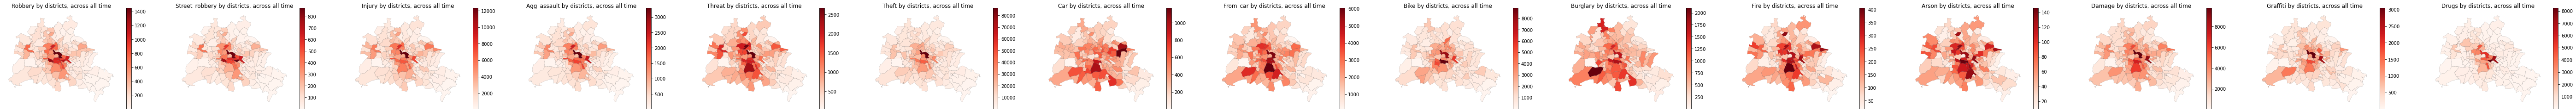

In [12]:
%matplotlib inline

fig, ax = plt.subplots(ncols=len(crime_cols), figsize=(100,4))

for idx, col in enumerate(crime_cols):


    (gpd.GeoDataFrame(df_all.groupby('Location')
                      .agg({col:sum,
                            'geometry': lambda x: x.iloc[0]})
                      .reset_index())
                      .plot(column=col, 
                            cmap='Reds', 
                            ax=ax[idx],
                            legend=True,
                            edgecolor='k',
                            linewidth=0.1))

    ax[idx].set_title(f"{col} by districts, across all time")
    ax[idx].axis('off')

### How do number of crimes compare with the population in the district?